# 
Maybe try simple linear regression and polynomial as well?

Mean Squared Error: 0.30916528527409337
R^2 Score: 0.9202053161791337
Coefficient: [2.82940984]
Intercept: 4.089361861445758


/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


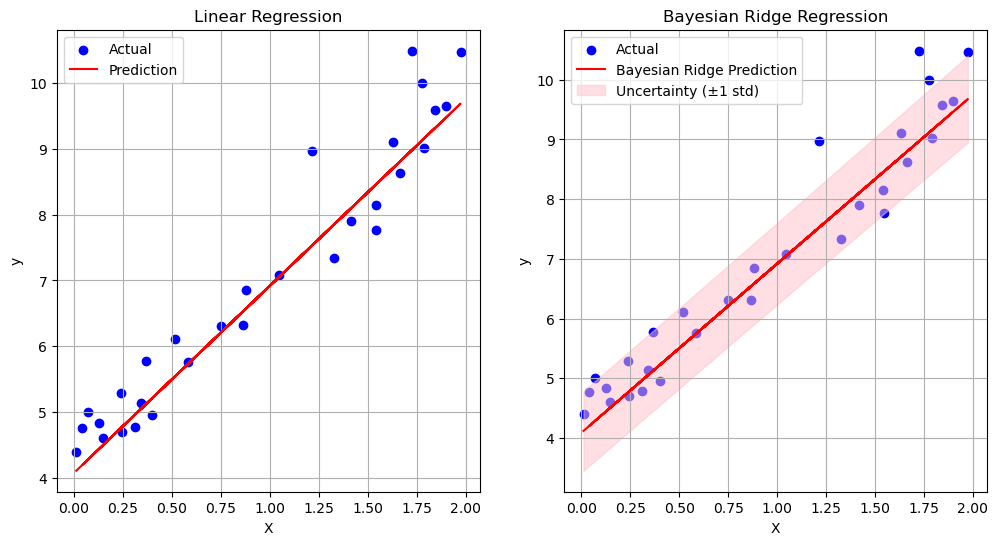

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

noise_factor = 0.7  # Adjust this to increase or decrease noise in the data

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # np.random.rand generates an array of numbers within [0,1) range. We can specify the array dimensions (rows, columns)
                                # Times it by 2 to generate numbers within the [0,2) range
y = 4 + 3 * X + np.random.randn(100, 1) * noise_factor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===================== Simple Linear Regression =====================
# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# ===================== Bayesian Linear Regression =====================
# Train a linear regression model
bayes_reg = BayesianRidge()
bayes_reg.fit(X_train, y_train)

# Predict on the test set
y_mean, y_std = bayes_reg.predict(X_test, return_std=True)

# Print learned coefficients
print("Coefficient:", bayes_reg.coef_)
print("Intercept:", bayes_reg.intercept_)

# ============================== Plot =============================
sorted_idx = np.argsort(X_test.squeeze())
X_sorted = X_test.squeeze()[sorted_idx]
y_mean_sorted = y_mean[sorted_idx]
y_std_sorted = y_std[sorted_idx]

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X_test, y_test, color='blue', label='Actual')
ax[0].plot(X_test, y_pred, color='red', label='Prediction')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].set_title('Linear Regression')
ax[0].legend()
ax[0].grid(True)

# ax[1].scatter(X_test, y_test, color='blue', label='Actual')
# ax[1].plot(X_test, y_mean, color='red', label='Bayesian Ridge Prediction')
# ax[1].fill_between(X_test.squeeze(), y_mean - y_std, y_mean + y_std,
#                    color='pink', alpha=0.5, label='Uncertainty (±1 std)')
# ax[1].set_title('Bayesian Ridge Regression')
# ax[1].set_xlabel('X')
# ax[1].set_ylabel('y')
# ax[1].legend()
# ax[1].grid(True)

ax[1].scatter(X_test, y_test, color='blue', label='Actual')
ax[1].plot(X_test, y_mean, color='red', label='Bayesian Ridge Prediction')
ax[1].fill_between(X_sorted.squeeze(), 
                   y_mean_sorted - y_std_sorted, 
                   y_mean_sorted + y_std_sorted,
                   color='pink', alpha=0.5, label='Uncertainty (±1 std)')
ax[1].set_title('Bayesian Ridge Regression')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid(True)


plt.show()

Simple Polynomial Regression
Mean squared error: 0.39265770884714757
R2 value: 0.9303039624053939


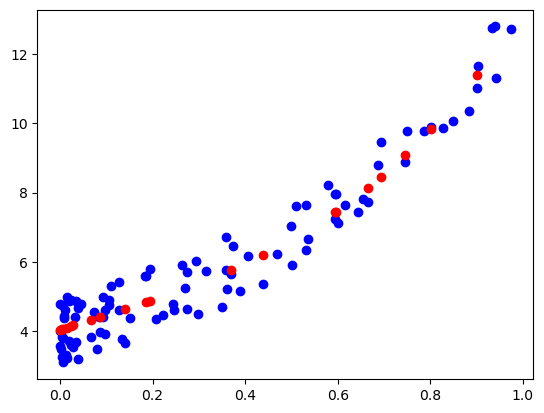

/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


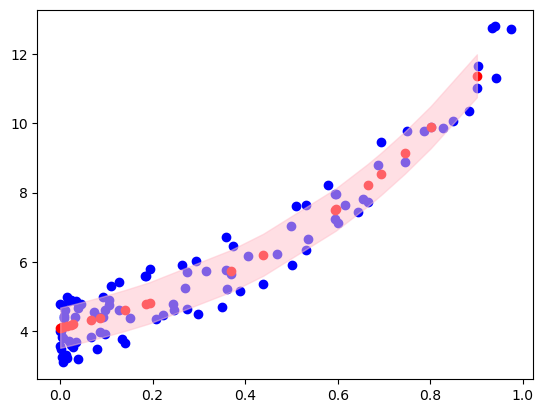

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# ============ Make synthetic data ============
noise_factor = 0.5

np.random.seed(42)
X = np.random.rand(100, 1)**2
y = 3 + 4*X + X**2 + 4 * X**3 + 2 * np.random.rand(100, 1)

poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size = 0.8, random_state=42)

# ============= Linear Regression ===============
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

print("Simple Polynomial Regression")
print(f"Mean squared error: {mean_squared_error(y_true = y_test, y_pred = y_pred_poly)}")
print(f"R2 value: {r2_score(y_true = y_test, y_pred = y_pred_poly)}")


plt.scatter(X[:, 0], y, color = 'blue')
plt.scatter(X_test[:, 0], y_pred_poly, color = 'red')
plt.legend
plt.show()

# =============== Bayesian Regression ===============
poly_baye_model = BayesianRidge()
poly_baye_model.fit(X_train, y_train)

y_predict_polybaye, y_std = poly_baye_model.predict(X_test, return_std=True)


sorted_idx = np.argsort(X_test[:, 0])
X_sorted = X_test[sorted_idx][:, 0]  # Get 1D array of x-values
y_mean_sorted = y_predict_polybaye[sorted_idx].flatten()
y_std_sorted = y_std[sorted_idx].flatten()


plt.scatter(X[:, 0], y, color = 'blue')
plt.scatter(X_test[:, 0], y_predict_polybaye, color = 'red')
plt.fill_between(X_sorted.squeeze(), 
                 y_mean_sorted - y_std_sorted, 
                 y_mean_sorted + y_std_sorted,
                 color='pink', alpha=0.5, label='Uncertainty (±1 std)')
plt.show()
